In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [6]:
train["Datetime"] = pd.to_datetime(train["Datetime"], format= "%d-%m-%Y %H:%M")
test["Datetime"] = pd.to_datetime(test["Datetime"], format= "%d-%m-%Y %H:%M")
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [7]:
train

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [8]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [9]:
i

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22


In [10]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [11]:
train

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5
...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3


In [12]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

In [13]:
train.index = train["Datetime"]
df=train.drop('ID',1)
ts = df["Count"]

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


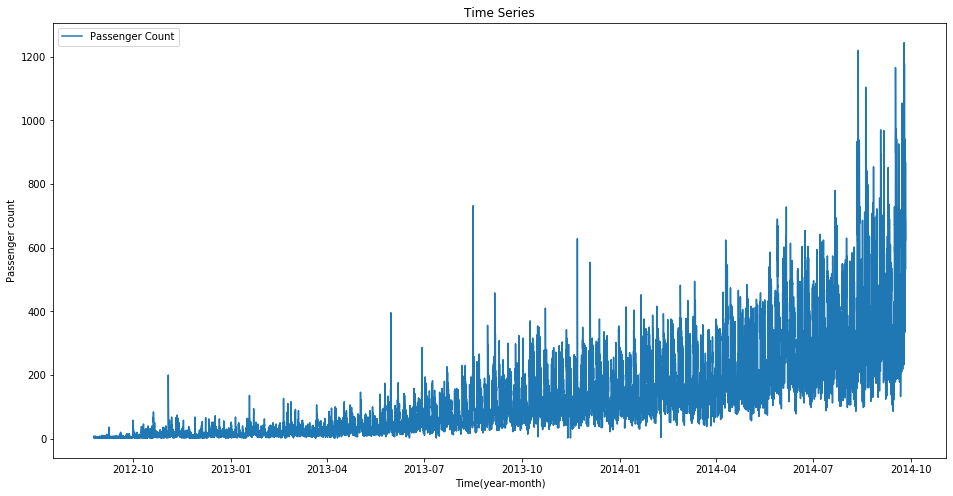

In [14]:
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

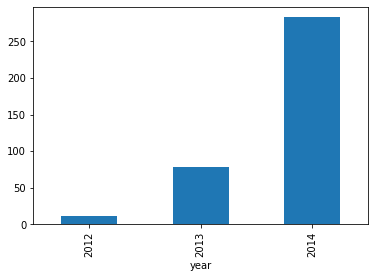

In [15]:
train.groupby("year")["Count"].mean().plot.bar()

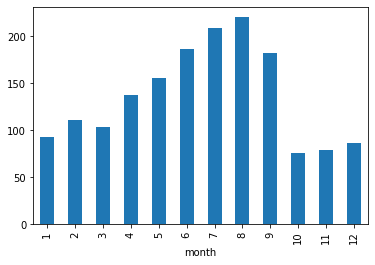

In [16]:
train.groupby("month")["Count"].mean().plot.bar()

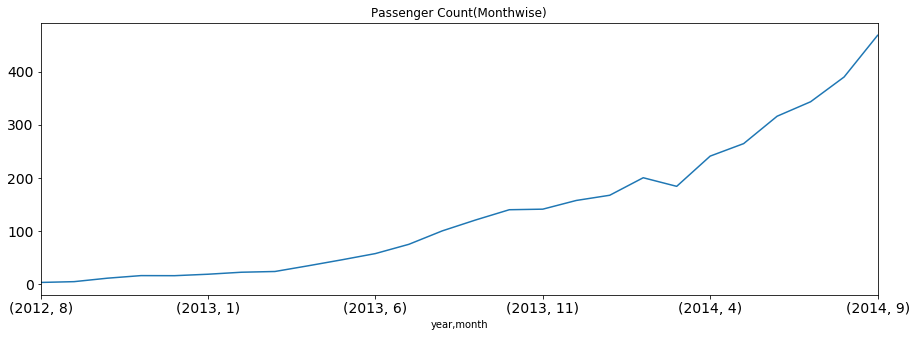

In [17]:
temp = train.groupby(["year","month"])["Count"].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

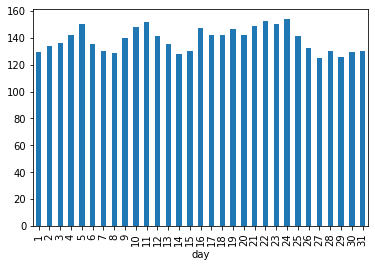

In [18]:
train.groupby('day')['Count'].mean().plot.bar()

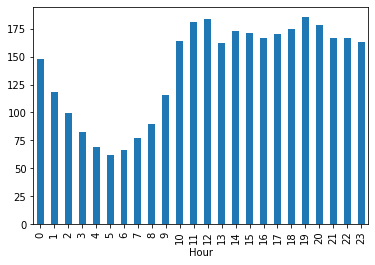

In [19]:
train.groupby('Hour')['Count'].mean().plot.bar()

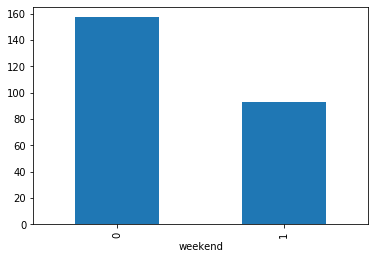

In [20]:
train.groupby('weekend')['Count'].mean().plot.bar()

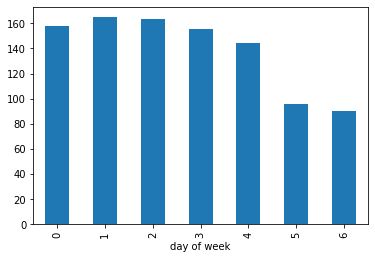

In [21]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [22]:
train=train.drop('ID',1)

In [23]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [24]:
hourly = train.resample('H').mean()

In [25]:
daily = train.resample('D').mean() 
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

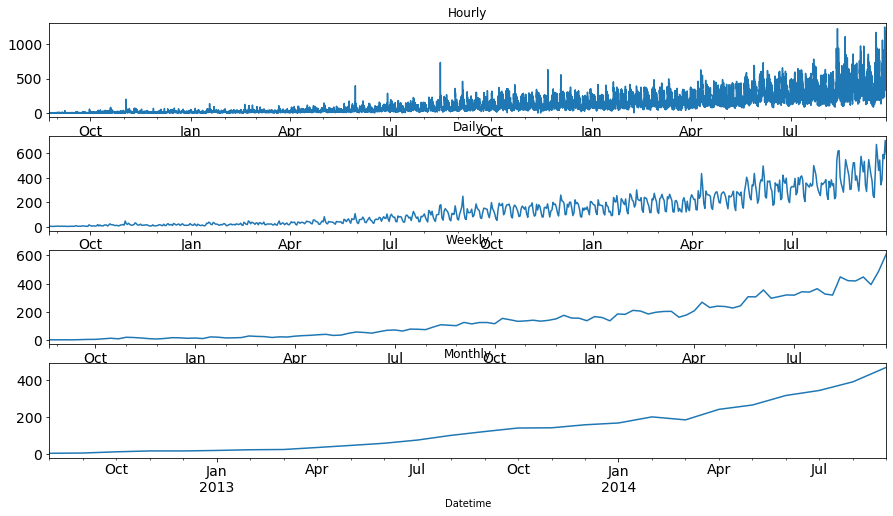

In [26]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

In [27]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [28]:
test = test.resample('D').mean() 
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [30]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


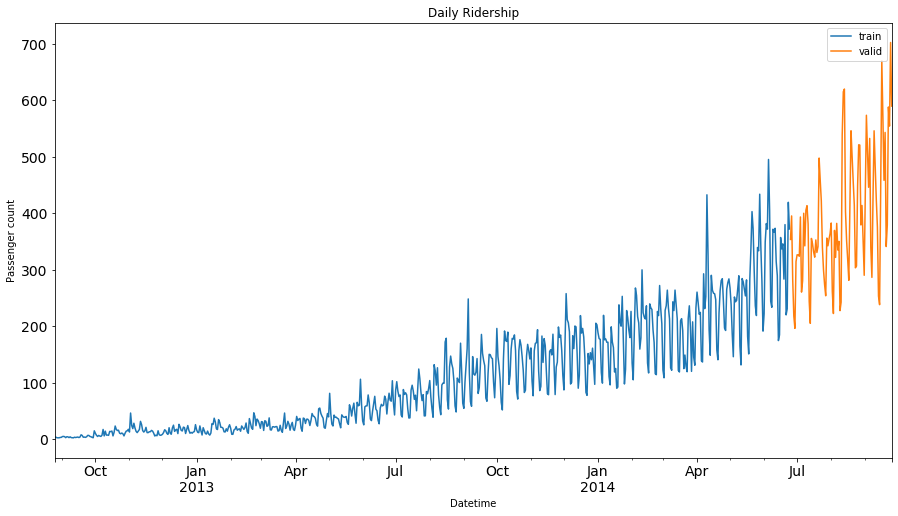

In [33]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

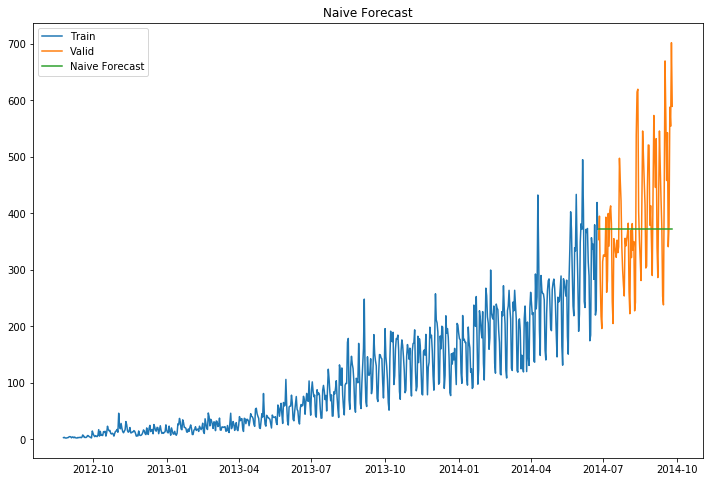

In [34]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


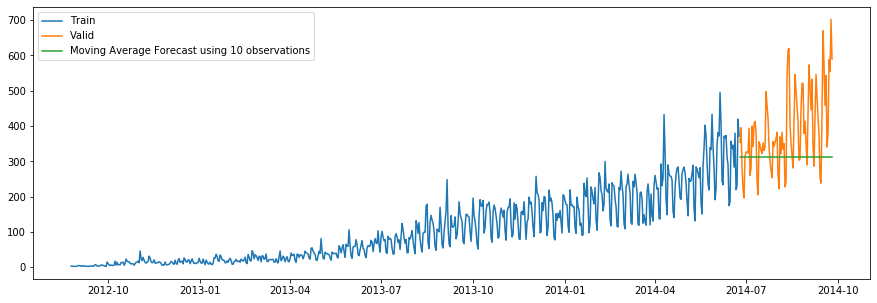

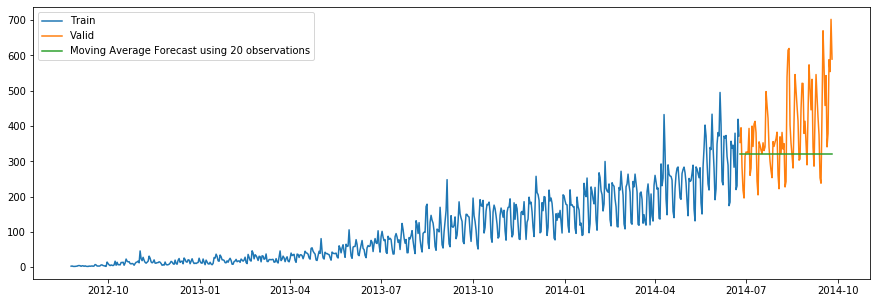

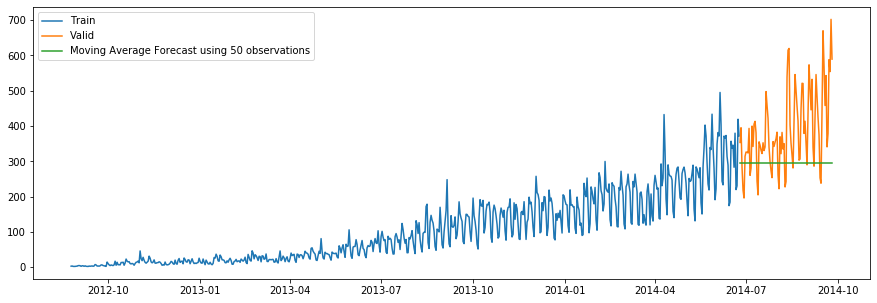

In [36]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [37]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986802


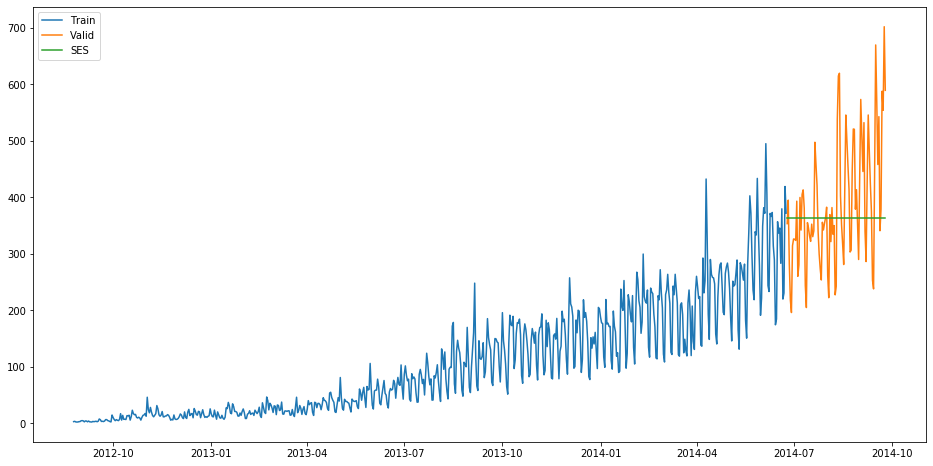

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [40]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


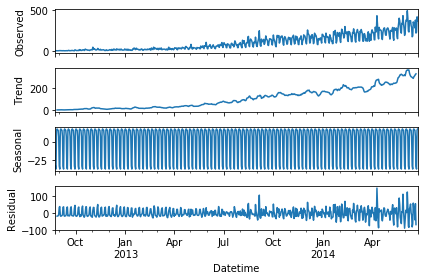

In [41]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

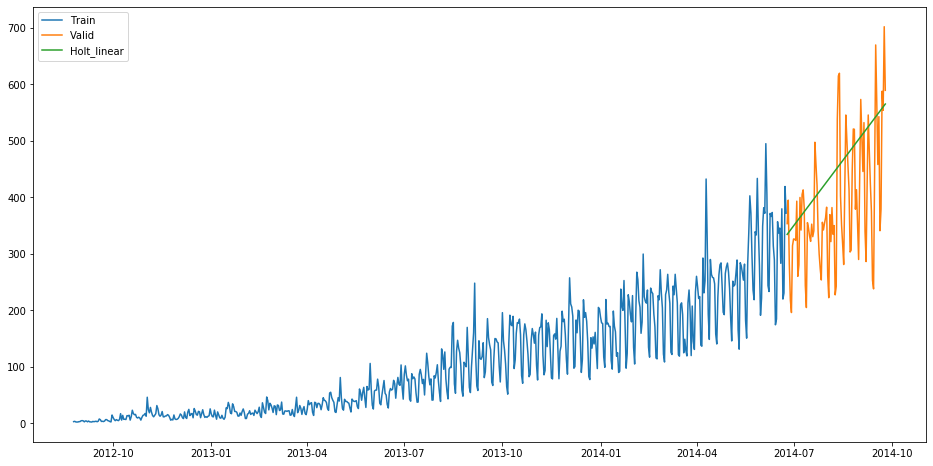

In [42]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [43]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


In [45]:
submission=pd.read_csv("Sample_Submission.csv")

In [46]:
predict=fit1.forecast(len(test))

In [47]:
test['prediction']=predict

In [49]:
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 
temp=train_original.groupby(['Hour'])['ratio'].sum() 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 
temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [51]:
prediction

,ID_x,day,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,26.0,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,26.0,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,26.0,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,26.0,334.650767,18292,4,0.020802,167.075574,18292
...,...,...,...,...,...,...,...,...
5107,23387.5,26.0,866.398583,23395,19,0.055627,1156.675482,23395
5108,23387.5,26.0,866.398583,23396,20,0.053455,1111.525192,23396
5109,23387.5,26.0,866.398583,23397,21,0.049895,1037.491153,23397
5110,23387.5,26.0,866.398583,23398,22,0.050076,1041.255041,23398


In [52]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')